In [1]:
pip install --upgrade pip --user

In [2]:
#pip install pandas --user 

In [3]:
import pandas as pd
import numpy as np
np.random.seed(42)

In [4]:
ol_data=pd.read_csv("OJ.csv")

In [5]:
ol_data

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,1067,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,1068,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,1069,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [6]:
#pip install --ignore-installed pandas_profiling --user

In [7]:
import pandas_profiling as pp

In [8]:
pp.ProfileReport(ol_data)

In [9]:
X = ol_data.copy()
y = X[['Purchase']]
X = X.drop(['Purchase'], axis=1)

In [11]:
#from my pandas profilling, PctDiscMM & PctDiscCH are highly correlated with DiscCH & DiscMM,STORE's mapping doesn't make sense and Store_7 is a 
#bineary for which store customer visit, I would prefer keep STORE_ID
X_train_1st_drop = X.drop(['Unnamed_0','PctDiscMM','PctDiscCH','Store7','STORE'],axis=1)
X_test_1st_drop = X.drop(['Unnamed_0','PctDiscMM','PctDiscCH','Store7','STORE'],axis=1)

In [12]:
category_variable=['StoreID','SpecialCH','SpecialMM']
numeric_variable=['WeekofPurchase','PriceCH','PriceMM','DiscCH','DiscMM','LoyalCH','SalePriceMM','SalePriceCH','PriceDiff','ListPriceDiff']

In [13]:
correlated_features = set()
correlation_matrix = X[numeric_variable].corr()
correlation_matrix

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,ListPriceDiff
WeekofPurchase,1.000000,0.704324,0.576872,0.365722,0.242334,0.192897,0.101719,0.201256,-0.011610,0.053038
PriceCH,0.704324,1.000000,0.616402,0.151900,0.116310,0.077793,0.229383,0.586716,-0.096335,-0.177935
PriceMM,0.576872,0.616402,1.000000,0.065206,-0.001246,0.115570,0.532859,0.384941,0.292594,0.665187
DiscCH,0.365722,0.151900,0.065206,1.000000,0.018035,0.139400,0.019416,-0.711274,0.393615,-0.062551
DiscMM,0.242334,0.116310,-0.001246,0.018035,1.000000,-0.020292,-0.846868,0.067940,-0.823908,-0.111848
LoyalCH,0.192897,0.077793,0.115570,0.139400,-0.020292,1.000000,0.078631,-0.058887,0.104261,0.070659
SalePriceMM,0.101719,0.229383,0.532859,0.019416,-0.846868,0.078631,1.000000,0.147222,0.852798,0.448395
SalePriceCH,0.201256,0.586716,0.384941,-0.711274,0.067940,-0.058887,0.147222,1.000000,-0.390999,-0.075294
PriceDiff,-0.011610,-0.096335,0.292594,0.393615,-0.823908,0.104261,0.852798,-0.390999,1.000000,0.457000
ListPriceDiff,0.053038,-0.177935,0.665187,-0.062551,-0.111848,0.070659,0.448395,-0.075294,0.457000,1.000000


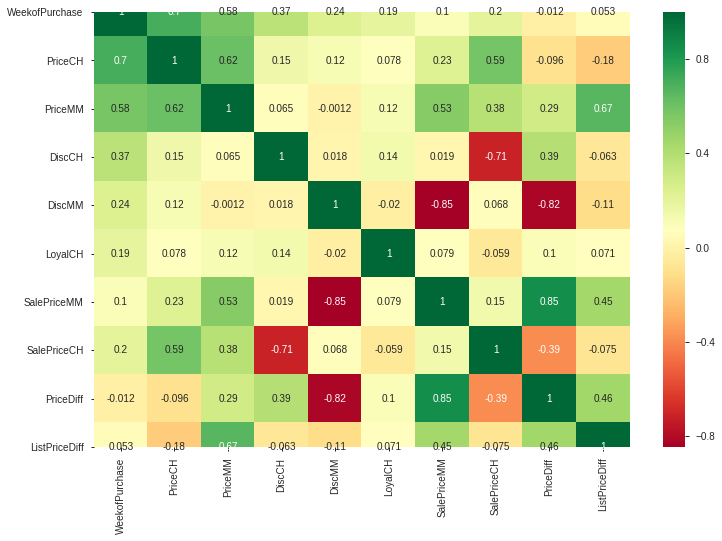

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.subplots(figsize=(12, 8))
sns.heatmap(X[numeric_variable].corr(), annot=True, cmap="RdYlGn")
plt.show()

In [15]:
contingency_table_1=pd.crosstab(X['StoreID'],X["SpecialCH"])
contingency_table_2=pd.crosstab(X['StoreID'],X["SpecialMM"])
contingency_table_3=pd.crosstab(X['SpecialCH'],X["SpecialMM"])
print(contingency_table_1)
print(contingency_table_2)
print(contingency_table_3)

SpecialCH    0    1
StoreID            
1          149    8
2          214    8
3          187    9
4          131    8
7          231  125
SpecialMM    0   1
StoreID           
1          108  49
2          154  68
3          190   6
4          131   8
7          314  42
SpecialMM    0    1
SpecialCH          
0          743  169
1          154    4


In [16]:
from scipy import stats
print(stats.chi2_contingency(contingency_table_1))
print(stats.chi2_contingency(contingency_table_2))
print(stats.chi2_contingency(contingency_table_3))

(175.8255836491154, 5.873863757993187e-37, 4, array([[133.81682243,  23.18317757],
       [189.21869159,  32.78130841],
       [167.05794393,  28.94205607],
       [118.47476636,  20.52523364],
       [303.4317757 ,  52.5682243 ]]))
(101.44492116003278, 4.843891858710371e-21, 4, array([[131.61588785,  25.38411215],
       [186.10654206,  35.89345794],
       [164.31028037,  31.68971963],
       [116.52616822,  22.47383178],
       [298.4411215 ,  57.5588785 ]]))
(24.265626470442143, 8.392344073025548e-07, 1, array([[764.54579439, 147.45420561],
       [132.45420561,  25.54579439]]))


In [17]:
from sklearn.model_selection import train_test_split

y['Purchase'] = y['Purchase'].map({'CH': 1, 'MM': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
#from my pandas profilling, PctDiscMM & PctDiscCH are highly correlated with DiscCH & DiscMM,STORE's mapping doesn't make sense and Store_7 is a 
#bineary for which store customer visit, I would prefer keep STORE_ID
X_train_1st_drop = X_train.drop(['Unnamed_0','PctDiscMM','PctDiscCH','Store7','STORE'],axis=1)
X_test_1st_drop = X_test.drop(['Unnamed_0','PctDiscMM','PctDiscCH','Store7','STORE'],axis=1)

In [19]:
X_train_1st_drop

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,ListPriceDiff
442,258,1,1.76,2.18,0.00,0.00,0,0,0.733760,2.18,1.76,0.42,0.42
464,265,7,1.86,2.13,0.37,0.00,1,0,0.733760,2.13,1.49,0.64,0.27
504,244,3,1.99,2.23,0.00,0.00,0,0,0.754240,2.23,1.99,0.24,0.24
732,276,4,2.09,2.09,0.20,0.40,0,0,0.320000,1.69,1.89,-0.20,0.00
388,233,2,1.69,1.69,0.00,0.00,0,0,0.105838,1.69,1.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,262,1,1.76,1.99,0.00,0.40,0,1,0.500000,1.59,1.76,-0.17,0.23
466,269,7,1.86,2.13,0.27,0.00,1,0,0.829606,2.13,1.59,0.54,0.27
121,261,1,1.76,1.99,0.00,0.00,0,0,0.967444,1.99,1.76,0.23,0.23
1044,241,1,1.86,1.99,0.00,0.30,0,1,0.777178,1.69,1.86,-0.17,0.13


In [20]:
X_test_1st_drop

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,ListPriceDiff
644,239,3,1.79,2.23,0.00,0.0,0,0,0.670149,2.23,1.79,0.44,0.44
629,260,2,1.86,2.18,0.00,0.7,0,0,0.456000,1.48,1.86,-0.38,0.32
70,274,4,1.99,2.09,0.00,0.4,0,0,0.718311,1.69,1.99,-0.30,0.10
962,227,1,1.69,1.69,0.00,0.0,0,0,0.600000,1.69,1.69,0.00,0.00
787,273,3,1.99,2.09,0.00,0.4,0,0,0.053687,1.69,1.99,-0.30,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,232,1,1.69,1.99,0.00,0.0,1,0,0.836160,1.99,1.69,0.30,0.30
77,251,4,1.99,2.23,0.00,0.0,0,0,0.836160,2.23,1.99,0.24,0.24
84,275,4,2.09,2.09,0.00,0.4,0,0,0.965640,1.69,2.09,-0.40,0.00
918,277,1,1.99,2.13,0.24,0.0,0,0,0.416000,2.13,1.75,0.38,0.14


In [21]:
#onehot ecnoding of storeID 
one_hot = pd.get_dummies(X_train_1st_drop['StoreID'])
X_train_1st_drop = X_train_1st_drop.drop('StoreID',axis = 1)
X_train_1st_drop = X_train_1st_drop.join(one_hot)
X_train_1st_drop 

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,ListPriceDiff,1,2,3,4,7
442,258,1.76,2.18,0.00,0.00,0,0,0.733760,2.18,1.76,0.42,0.42,1,0,0,0,0
464,265,1.86,2.13,0.37,0.00,1,0,0.733760,2.13,1.49,0.64,0.27,0,0,0,0,1
504,244,1.99,2.23,0.00,0.00,0,0,0.754240,2.23,1.99,0.24,0.24,0,0,1,0,0
732,276,2.09,2.09,0.20,0.40,0,0,0.320000,1.69,1.89,-0.20,0.00,0,0,0,1,0
388,233,1.69,1.69,0.00,0.00,0,0,0.105838,1.69,1.69,0.00,0.00,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,262,1.76,1.99,0.00,0.40,0,1,0.500000,1.59,1.76,-0.17,0.23,1,0,0,0,0
466,269,1.86,2.13,0.27,0.00,1,0,0.829606,2.13,1.59,0.54,0.27,0,0,0,0,1
121,261,1.76,1.99,0.00,0.00,0,0,0.967444,1.99,1.76,0.23,0.23,1,0,0,0,0
1044,241,1.86,1.99,0.00,0.30,0,1,0.777178,1.69,1.86,-0.17,0.13,1,0,0,0,0


In [22]:
#onehot ecnoding of storeID 
one_hot = pd.get_dummies(X_test_1st_drop['StoreID'])
X_test_1st_drop= X_test_1st_drop.drop('StoreID',axis = 1)
X_test_1st_drop = X_test_1st_drop.join(one_hot)
X_test_1st_drop

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,ListPriceDiff,1,2,3,4,7
644,239,1.79,2.23,0.00,0.0,0,0,0.670149,2.23,1.79,0.44,0.44,0,0,1,0,0
629,260,1.86,2.18,0.00,0.7,0,0,0.456000,1.48,1.86,-0.38,0.32,0,1,0,0,0
70,274,1.99,2.09,0.00,0.4,0,0,0.718311,1.69,1.99,-0.30,0.10,0,0,0,1,0
962,227,1.69,1.69,0.00,0.0,0,0,0.600000,1.69,1.69,0.00,0.00,1,0,0,0,0
787,273,1.99,2.09,0.00,0.4,0,0,0.053687,1.69,1.99,-0.30,0.10,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,232,1.69,1.99,0.00,0.0,1,0,0.836160,1.99,1.69,0.30,0.30,1,0,0,0,0
77,251,1.99,2.23,0.00,0.0,0,0,0.836160,2.23,1.99,0.24,0.24,0,0,0,1,0
84,275,2.09,2.09,0.00,0.4,0,0,0.965640,1.69,2.09,-0.40,0.00,0,0,0,1,0
918,277,1.99,2.13,0.24,0.0,0,0,0.416000,2.13,1.75,0.38,0.14,1,0,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_1st_drop.iloc[:,[0,1,2,3,4,7,8,9,10,11]] = scaler.fit_transform(X_train_1st_drop.iloc[:,[0,1,2,3,4,7,8,9,10,11]])
X_test_1st_drop.iloc[:,[0,1,2,3,4,7,8,9,10,11]] = scaler.fit_transform(X_test_1st_drop.iloc[:,[0,1,2,3,4,7,8,9,10,11]])

In [24]:
X_train_1st_drop

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,ListPriceDiff,1,2,3,4,7
442,0.246927,-1.034000,0.698559,-0.417256,-0.569806,0,0,0.556144,0.847852,-0.415085,1.026722,1.873461,1,0,0,0,0
464,0.694898,-0.053167,0.325469,2.844641,-0.569806,1,0,0.556144,0.650903,-2.344355,1.853094,0.461579,0,0,0,0,1
504,-0.649015,1.221916,1.071648,-0.417256,-0.569806,0,0,0.622570,1.044801,1.228368,0.350599,0.179203,0,0,1,0,0
732,1.398852,2.202749,0.026998,1.345932,1.304112,0,0,-0.785878,-1.082245,0.513823,-1.302146,-2.079808,0,0,0,1,0
388,-1.352970,-1.720583,-2.957716,-0.417256,-0.569806,0,0,-1.480507,-1.082245,-0.915266,-0.550898,-2.079808,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.502910,-1.034000,-0.719181,-0.417256,1.304112,0,1,-0.202052,-1.476142,-0.415085,-1.189459,0.085077,1,0,0,0,0
466,0.950881,-0.053167,0.325469,1.963047,-0.569806,1,0,0.867018,0.650903,-1.629810,1.477470,0.461579,0,0,0,0,1
121,0.438914,-1.034000,-0.719181,-0.417256,-0.569806,0,0,1.314093,0.099447,-0.415085,0.313037,0.085077,1,0,0,0,0
1044,-0.841003,-0.053167,-0.719181,-0.417256,0.835632,0,1,0.696969,-1.082245,0.299460,-1.189459,-0.856177,1,0,0,0,0


In [25]:
X_test_1st_drop

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,ListPriceDiff,1,2,3,4,7
644,-1.037810,-0.807195,1.087740,-0.497043,-0.594492,0,0,0.314360,1.099625,-0.130426,1.037784,2.080868,0,0,1,0,0
629,0.329373,-0.118858,0.717391,-0.497043,2.671581,0,0,-0.385221,-1.907357,0.334022,-1.857452,0.990175,0,1,0,0,0
70,1.240829,1.159482,0.050764,-0.497043,1.271835,0,0,0.471696,-1.065402,1.196569,-1.574990,-1.009429,0,0,0,1,0
962,-1.819057,-1.790534,-2.912022,-0.497043,-0.594492,0,0,0.085198,-1.065402,-0.793923,-0.515757,-1.918340,1,0,0,0,0
787,1.175725,1.159482,0.050764,-0.497043,1.271835,0,0,-1.699495,-1.065402,1.196569,-1.574990,-1.009429,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,-1.493538,-1.790534,-0.689932,-0.497043,-0.594492,1,0,0.856684,0.137391,-0.793923,0.543476,0.808393,1,0,0,0,0
77,-0.256562,1.159482,1.087740,-0.497043,-0.594492,0,0,0.856684,1.099625,1.196569,0.331629,0.263046,0,0,0,1,0
84,1.305933,2.142820,0.050764,-0.497043,1.271835,0,0,1.279669,-1.065402,1.860066,-1.928068,-1.918340,0,0,0,1,0
918,1.436141,1.159482,0.347043,1.413745,-0.594492,0,0,-0.515892,0.698694,-0.395825,0.825938,-0.645865,1,0,0,0,0


Optimal number of features: 8
Selected features: ['SpecialCH', 'LoyalCH', 'SalePriceCH', 'PriceDiff', 'ListPriceDiff', 2, 4, 7]


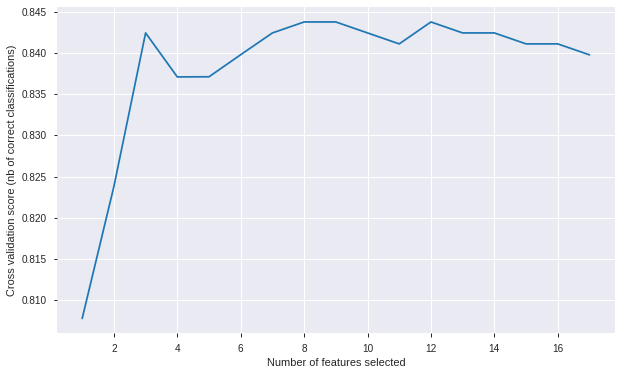

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train_1st_drop, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train_1st_drop.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

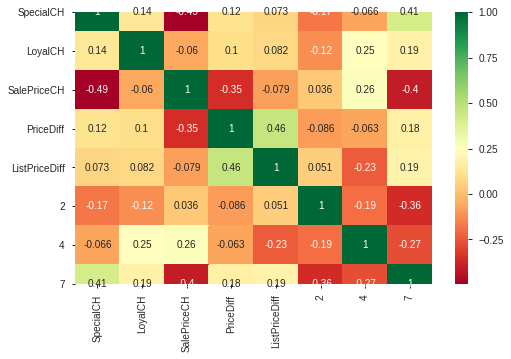

In [27]:
Selected_features = ['SpecialCH', 'LoyalCH', 'SalePriceCH', 'PriceDiff', 'ListPriceDiff', 2, 4, 7]
X_for_best_train=X_train_1st_drop[Selected_features]
plt.subplots(figsize=(8, 5))
sns.heatmap(X_for_best_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [29]:
#clf = SelectKBestCustom(mutual_info_classif,k=2)
sel_mutual = SelectKBest(mutual_info_classif, k=8)
X_train_mutual = sel_mutual.fit_transform(X_train_1st_drop, y_train)
print(sel_mutual.get_support())

[False  True False  True  True False False  True False False  True  True
 False  True  True False False]


In [30]:
mask = sel_mutual.get_support()
new_features = X_train_1st_drop.columns[mask]
new_features

Index(['PriceCH', 'DiscCH', 'DiscMM', 'LoyalCH', 'PriceDiff', 'ListPriceDiff',
       2, 3],
      dtype='object')

In [31]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_for_best_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
from sklearn.metrics import classification_report
X_for_best_test=X_test_1st_drop[Selected_features]
y_pred_log = logreg.predict(X_for_best_test)
print(classification_report(y_test, y_pred_log))
score_logreg = logreg.score(X_for_best_test, y_test)
print(score_logreg)

              precision    recall  f1-score   support

           0       0.80      0.70      0.74       128
           1       0.81      0.89      0.85       193

    accuracy                           0.81       321
   macro avg       0.81      0.79      0.80       321
weighted avg       0.81      0.81      0.81       321

0.8099688473520249


In [33]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [34]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_log)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_log)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_log)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_log)))

Accuracy = 0.81
Kappa = 0.59
F1 Score = 0.85
Log Loss = 6.56


In [35]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
cv_lg = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)
%time best_model = cv_lg.fit(X_for_best_train, y_train)

CPU times: user 920 ms, sys: 1.43 ms, total: 922 ms
Wall time: 920 ms


In [36]:
cv_lg.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
lg_best = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

lg_best.fit(X_for_best_train, y_train)

y_pred_lg_best = lg_best.predict(X_for_best_test)

In [38]:
print(classification_report(y_test, y_pred_lg_best))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74       128
           1       0.81      0.89      0.85       193

    accuracy                           0.81       321
   macro avg       0.81      0.79      0.80       321
weighted avg       0.81      0.81      0.81       321



In [39]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_lg_best)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_lg_best)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_lg_best)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_lg_best)))

Accuracy = 0.81
Kappa = 0.59
F1 Score = 0.85
Log Loss = 6.56


In [40]:
from sklearn.tree import DecisionTreeClassifier
#Selected_features_dst = ['WeekofPurchase', 'LoyalCH', 'PriceDiff']
#X_for_dst_train=X_train_1st_drop[Selected_features_dst]
#X_for_dst_test=X_test_1st_drop[Selected_features_dst]
DST_2 = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             max_depth=3, max_leaf_nodes=5)
DST_2.fit(X_for_best_train, y_train)

y_pred_dt_2 = DST_2.predict(X_for_best_test)

In [41]:
print(classification_report(y_test, y_pred_dt_2))

              precision    recall  f1-score   support

           0       0.82      0.62      0.71       128
           1       0.78      0.91      0.84       193

    accuracy                           0.79       321
   macro avg       0.80      0.76      0.77       321
weighted avg       0.80      0.79      0.79       321



In [42]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt_2)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt_2)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt_2)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt_2)))

Accuracy = 0.79
Kappa = 0.55
F1 Score = 0.84
Log Loss = 7.10


In [43]:
treeclf = DecisionTreeClassifier(splitter='best', presort=True, class_weight=None, random_state=42)
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[2, 3,4,5, 6], 'min_samples_split':[2, 10, 50], 'min_samples_leaf':[1, 5, 10],
             'max_features':[None, 'auto'], 'max_leaf_nodes':[None, 5, 10, 50], 'min_impurity_decrease':[0, 0.1, 0.2]}
cv_clf = GridSearchCV(treeclf, parameters, scoring='accuracy', cv=5, return_train_score=True)
%time cv_clf.fit(X_for_best_train, y_train)

CPU times: user 1min 45s, sys: 212 ms, total: 1min 45s
Wall time: 1min 45s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=True, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6],
                         

In [44]:
cv_clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=42, splitter='best')

In [45]:
DST_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=42, splitter='best')

DST_best.fit(X_for_best_train, y_train)

y_pred_dt_best = DST_best.predict(X_for_best_test)

In [46]:
print(classification_report(y_test, y_pred_dt_best))


              precision    recall  f1-score   support

           0       0.77      0.67      0.72       128
           1       0.80      0.87      0.83       193

    accuracy                           0.79       321
   macro avg       0.79      0.77      0.78       321
weighted avg       0.79      0.79      0.79       321



In [47]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt_best)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt_best)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt_best)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt_best)))

Accuracy = 0.79
Kappa = 0.55
F1 Score = 0.83
Log Loss = 7.21


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_for_best_train, y_train)

y_pred_knn = knn_clf.predict(X_for_best_test)

In [49]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       128
           1       0.79      0.80      0.79       193

    accuracy                           0.75       321
   macro avg       0.74      0.74      0.74       321
weighted avg       0.75      0.75      0.75       321



In [50]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_knn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_knn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_knn)))

Accuracy = 0.75
Kappa = 0.48
F1 Score = 0.79
Log Loss = 8.61


In [51]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 20)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_for_best_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7730450450450451, 0.7490090090090089, 0.789045045045045, 0.7904144144144143, 0.8157837837837837, 0.8077477477477478, 0.8197837837837838, 0.8063963963963963, 0.8224864864864865, 0.8171351351351351, 0.8318198198198198, 0.8304684684684684, 0.8384864864864865, 0.8345045045045045, 0.8371711711711711, 0.8398198198198198, 0.8371711711711711, 0.8411711711711712, 0.8398378378378378]


Text(0, 0.5, 'Cross-Validated Accuracy')

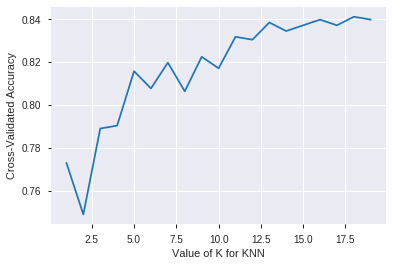

In [52]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [53]:
knn_clf_2 = KNeighborsClassifier(n_neighbors=13)
knn_clf_2.fit(X_for_best_train, y_train)
y_pred_knn_2 = knn_clf_2.predict(X_for_best_test)

In [54]:
print(classification_report(y_test, y_pred_knn_2))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       128
           1       0.81      0.87      0.84       193

    accuracy                           0.80       321
   macro avg       0.79      0.78      0.78       321
weighted avg       0.80      0.80      0.80       321



In [55]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_knn_2)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_knn_2)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_knn_2)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_knn_2)))

Accuracy = 0.80
Kappa = 0.57
F1 Score = 0.84
Log Loss = 6.99


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_for_best_train,y_train)
y_pred_rfc = rfc.predict(X_for_best_test)

In [57]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       128
           1       0.80      0.81      0.80       193

    accuracy                           0.76       321
   macro avg       0.75      0.75      0.75       321
weighted avg       0.76      0.76      0.76       321



In [58]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_rfc)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_rfc)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_rfc)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_rfc)))

Accuracy = 0.76
Kappa = 0.50
F1 Score = 0.80
Log Loss = 8.29


In [59]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_for_best_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [60]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 200}

In [61]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=4, criterion='gini')

In [62]:
rfc1.fit(X_for_best_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [63]:
y_pred_rfc_2=rfc1.predict(X_for_best_test)

In [64]:
print(classification_report(y_test, y_pred_rfc_2))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       128
           1       0.82      0.89      0.85       193

    accuracy                           0.82       321
   macro avg       0.81      0.80      0.80       321
weighted avg       0.82      0.82      0.81       321



In [65]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_rfc_2)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_rfc_2)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_rfc_2)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_rfc_2)))

Accuracy = 0.82
Kappa = 0.61
F1 Score = 0.85
Log Loss = 6.35


In [66]:
from sklearn.svm import SVC

svm_clf_l = SVC(kernel="linear", C=0.025)
svm_clf_l.fit(X_for_best_train, y_train)

y_pred_svm_l = svm_clf_l.predict(X_for_best_test)

In [67]:
print(classification_report(y_test, y_pred_svm_l))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       128
           1       0.82      0.87      0.84       193

    accuracy                           0.80       321
   macro avg       0.80      0.79      0.79       321
weighted avg       0.80      0.80      0.80       321



In [68]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm_l)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm_l)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm_l)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm_l)))

Accuracy = 0.80
Kappa = 0.58
F1 Score = 0.84
Log Loss = 6.78


In [69]:
svm_clf_r = SVC(kernel='rbf', C = 10.0, gamma=0.1)
svm_clf_r.fit(X_for_best_train, y_train)
y_pred_svm_r = svm_clf_r.predict(X_for_best_test)

In [70]:
print(classification_report(y_test, y_pred_svm_r))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72       128
           1       0.79      0.89      0.84       193

    accuracy                           0.79       321
   macro avg       0.80      0.77      0.78       321
weighted avg       0.79      0.79      0.79       321



In [71]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm_r)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm_r)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm_r)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm_r)))

Accuracy = 0.79
Kappa = 0.56
F1 Score = 0.84
Log Loss = 7.10


In [72]:
svm_clf_s = SVC(kernel='sigmoid', C = 10.0, gamma=0.1)
svm_clf_s.fit(X_for_best_train, y_train)
y_pred_svm_s = svm_clf_s.predict(X_for_best_test)

In [73]:
print(classification_report(y_test, y_pred_svm_s))

              precision    recall  f1-score   support

           0       0.68      0.62      0.64       128
           1       0.76      0.80      0.78       193

    accuracy                           0.73       321
   macro avg       0.72      0.71      0.71       321
weighted avg       0.73      0.73      0.73       321



In [74]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm_s)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm_s)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm_s)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm_s)))

Accuracy = 0.73
Kappa = 0.43
F1 Score = 0.78
Log Loss = 9.36


In [75]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

scores = ['accuracy','recall','precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_for_best_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.614 (+/-0.003) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.614 (+/-0.003) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.614 (+/-0.003) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.614 (+/-0.003) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.748 (+/-0.028) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.614 (+/-0.003) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.614 (+/-0.003) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.614 (+/-0.003) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.748 (+/-0.028) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.614 (+/-0.003) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.614 (+/-0.003) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.614 (+/-0.003) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.850 (+/-0.024) for {'C': 10, 'gamma': 0.01, 'k

In [76]:
clf.best_params_

{'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}

In [77]:
svm_clf_best = SVC(C=25, kernel="rbf",gamma= 0.001,probability=True)
svm_clf_best.fit(X_for_best_train, y_train)
y_pred_svm_best = svm_clf_best.predict(X_for_best_test)

In [78]:
print(classification_report(y_test, y_pred_svm_best))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       128
           1       0.81      0.87      0.84       193

    accuracy                           0.80       321
   macro avg       0.80      0.78      0.79       321
weighted avg       0.80      0.80      0.80       321



In [79]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm_best)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm_best)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm_best)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm_best)))

Accuracy = 0.80
Kappa = 0.58
F1 Score = 0.84
Log Loss = 6.89


In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = [lg_best, 
               DST_best, 
               knn_clf_2, 
               rfc1,
               svm_clf_best]
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_for_best_train, y_train)
    yproba = model.predict_proba(X_for_best_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)

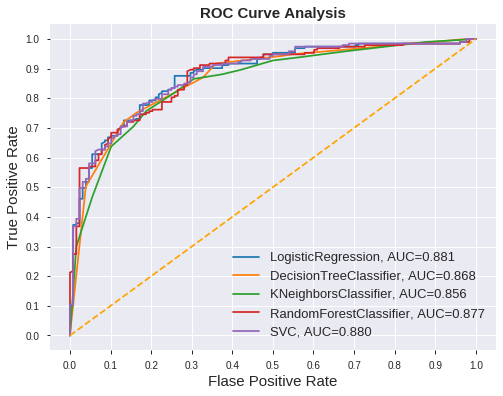

In [81]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()